# Representative firm/household

We will start simple and only consider that there is one representative firm and household.

Start with assuming no cross-border investments. Only focus on the dynamic for now

## Firm

### Production
Capital at time $t$: $$K_t$$
Output: $$Y_t = A_{t}K_{t}^{\alpha}$$
Where: $$A_t = \mu + \epsilon_t,  \epsilon_t ~ \mathcal{N}(0,\sigma ^2)$$

### Depreciation
Let $\delta \in (0,1)$ be the depreciation rate.

Capital evolves as: $$K_{t+1} = (1-\delta)K_t + I_t$$
Where $I_t$ is gross investment.

### Marginal product of capital
$$MPK_t = \frac{\partial Y_t}{\partial K_t} = \alpha A_t K_t^{\alpha-1}$$

Expected marginal product.
$$\mathbb{E}[MPK_t] = \alpha \mu K_t^{\alpha -1}$$

### Investment condition
The firm compares expected marginal return to required return $r$.
The correct optimality condition is:
$$\alpha \mu K_t^{\alpha -1} = r + \delta$$

### Optimal capital level
Solve.
$$\alpha \mu K^{\alpha -1} = r + \delta$$
$$K^* = (\frac{\alpha \mu}{r + \delta})^\frac{1}{1-\alpha}$$

### Investment decision
If current capital is $K_t$, then the desired invetsment is $$I_t = K^* - (1-\delta)K_t$$
Because next period's capital must equal $K^*$:$$K_{t+1}=K^*$$

## One country, One firm

In [1]:
### FIRM FUNCTIONS ###
def optimal_capital_level(alpha, mu, r, delta):
    return ((alpha * mu) / (r + delta)) ** (1 / (1 - alpha))

def investment_decision(capital, optimal_capital):
    return optimal_capital - capital

## Household

### Wealth Dynamics

Financial wealth evolves as:

$$
W_{t+1} = (W_t - C_t) R_{p,t+1} + Y_t^L
$$

**Variables**

- $W_t$ = financial wealth at time $t$  
- $C_t$ = consumption at time $t$  
- $R_{p,t+1}$ = gross portfolio return between $t$ and $t+1$  
- $Y_t^L$ = exogenous labour income  

### Portfolio Return

$$
R_{p,t+1} = \mathcal{w}_t R_{e,t+1} + (1-\mathcal{w}_t) R_f
$$

**Variables**

- $\mathcal{w}_t \in [0,1]$ = share invested in risky equity  
- $R_{e,t+1}$ = gross return on risky equity  
- $R_f$ = gross risk-free return  

### Habit Formation

Habit evolves according to:

$$
H_{t+1} = \lambda H_t + (1-\lambda) C_t
$$

**Variables**

- $H_t$ = habit stock (consumption benchmark)  
- $\lambda \in (0,1)$ = persistence of habit  

Effective consumption relative to habit:

$$
\tilde{C}_t = C_t - H_t
$$

Habit makes drops in consumption more painful.

### Prospect Theory over Wealth Changes

Define a reference wealth level:

$$
\bar{W}_t
$$

Gain or loss relative to reference:

$$
X_{t+1} = W_{t+1} - \bar{W}_t
$$

### Value Function

$$
v(X) =
\begin{cases}
X^{\alpha_p} & X \ge 0 \\
-\kappa (-X)^{\alpha_p} & X < 0
\end{cases}
$$

**Parameters**

- $\alpha_p \in (0,1)$ = diminishing sensitivity  
- $\kappa > 1$ = loss aversion  

### Probability Weighting

Objective probabilities $p$ are distorted using:

$$
\pi(p) = \frac{p^{\eta}}{\left(p^{\eta} + (1-p)^{\eta}\right)^{1/\eta}}
$$

**Parameter**

- $\eta \in (0,1)$ = probability distortion parameter  

Small probabilities may be overweighted.

### Lifetime Objective

The household chooses $\{C_t, \mathcal{w}_t\}$ to maximise:

$$
\max_{\{C_t,\mathcal{w}_t\}}
\mathbb{E}^{PT}_0
\sum_{t=0}^{\infty}
\beta^t
\left[
v(W_{t+1} - \bar{W}_t)
+
\theta \, v(C_t - H_t)
\right]
$$

**Parameters**

- $\beta \in (0,1)$ = time discount factor  
- $\theta > 0$ = weight on consumption relative to wealth  
- $\mathbb{E}^{PT}$ = expectation using probability weighting  

### Interpretation

Households:

- Evaluate outcomes relative to reference points  
- Are loss averse  
- Exhibit diminishing sensitivity  
- Distort probabilities  
- Develop consumption habits over time  


In [2]:
### HOUSEHOLD FUNCTIONS ###


## Simulation steps

1. Solve for the required rate of return. Likely will be a curve from prospect and habit formation.
2. Firms solve for the optimal capital form. And calculate the desired investments.
3. Given $r_t$, expected return is implied. Households solve for the optimal portfolio weights.
   1. This will result in realised prices through a market clearing procedure. We calculate $p^*$ that clears demand and supply.
4. We realise the returns for the year.
   1. I am guessing we don't update the prices of the stocks here, that is left to the market clearance. Maybe we update ho wmuch the value of the firm has changed. Then in the next year the households bid again (if they want to change holdings).

Notes:
- How do we update the wealth of households? Maybe after we realise the year and the firm value (Step 4).

1. Households determine required rate of return slope.
   1. Given preferences (prospect + habit), expected consumption, and risk, they imply a required rate of return schedule for equity. This is a demand curve for risky assets.
2. Joint equilirbium: investment and market clearing.
   1. Guess a required rate of return $r_t$.
   2. Given $r-t$ firms solve $MPK_t = r_t + \delta$.
   3. Which gives optimal $K_t^*$ and desired investment $I_t = K_t^* - K_t$.
   4. Given $r_t$, households choose optimal portfolio weights based on expected return and risk.
   5. Compare 
      1. Households demand for equity.
      2. Firm equity supply (implied by desired investmnets).
   6. Adjust $r_t$ until $Total household demand = Total firm equity supplied$.
   7. At this equilirbium
      1. Market price $p^*$ is determined.
      2. Implied rate of return is consistent with both firm investmnet and household demand.
      3. Capital and portfolio allocation are jointly determined. Like it would be determined over a year.
3. Production and return realisation.
   1. Given $K_t$, output is produced.
   2. A productivity shock is realised.
   3. Firm profits are determined.
   4. Dividends (if any) are paid.


Firm capital: $$K_{t+1} = (1-\delta)K_t + I_t$$
Household wealth: $$W_{t+1} = (W_t-C_t)[\mathcal{w}_t(1+R_{t+1}) + (1-\mathcal{w}_t)(1+r_f)] + dividends$$

- How interlinked are countries productivity shocks?
- Can they invest in riskfree of other countries? Or only their own? Or do we have only one riskfree across the countries?
- Firms have no costs. So profit is $\Pi_t = Y_t$.

In [ ]:
### FIRM CORE ###
def productivity_shock(mu, sigma, rng):
    """Draw a productivity shock from a normal distribution."""
    return mu + rng.normal(0, sigma)

def production(alpha, A_t, K_t):
    """Calculate output based on the Cobb-Douglas production function."""
    return A_t * (K_t ** alpha)

def optimal_capital_level(alpha, mu, r, delta):
    """Calculate the optimal capital level for a firm given parameters."""
    return ((alpha * mu) / (r + delta)) ** (1 / (1 - alpha))

def investment_decision(K_t, K_star):
    """Calculate the investment decision based on current and optimal capital levels."""
    return K_star - K_t

def update_capital(K_t, I_t, delta):
    """Update the capital stock based on investment and depreciation."""
    return (1 - delta) * K_t + I_t

In [44]:
### HOUSEHOLD CORE ###
def update_habit(H_t, C_t, rho):
    """Update the habit stock based on current consumption and previous habit stock."""
    return rho * H_t + (1 - rho) * C_t

def prospect_value(x, alpha_gain, beta_loss, lambda_loss):
    """Calculate the prospect value based on gains and losses."""
    if x >= 0:
        return x ** alpha_gain
    else:
        return -lambda_loss * ((-x) ** beta_loss)

def update_wealth(W_t, C_t, R_next, dividends):
    """Update the household's wealth based on consumption, returns, and dividends."""
    return (W_t - C_t) * R_next + dividends


In [77]:
import numpy as np
from scipy.optimize import minimize

def household_pricing_function(
    expected_returns,
    K_vec,
    params,
    n_draws=300,
    rng=np.random.default_rng(42),
    allow_cross_border=False
):
    
    N = len(expected_returns)
    sigma_vec = params["sigma_vec"]
    r_f = params["r_f"]
    
    # Domestic mask (identity)
    domestic_mask = np.eye(N)
    
    def expected_utility_weights(weights):
        
        # --- Restrict cross-border if disabled ---
        if not allow_cross_border:
            # keep only diagonal elements
            weights = weights * np.diag(domestic_mask)
        
        if np.any(weights < 0):
            return 1e10
        
        if weights.sum() > 1:
            return 1e10
        
        # Simulate risky returns
        R_draws = np.array([
            rng.normal(expected_returns[j], sigma_vec[j], size=n_draws)
            for j in range(N)
        ])
        
        portfolio_returns = np.dot(weights, 1 + R_draws)
        riskfree_part = (1 - weights.sum()) * (1 + r_f)
        
        W0 = params["W_ref"]
        C = params["consumption_rate"] * W0
        
        W_next = (W0 - C) * (portfolio_returns + riskfree_part)
        
        wealth_gap = W_next - params["reference_level"]
        
        util = (
            (C ** params["gamma"]) / params["gamma"]
            + params["theta"] *
            np.where(
                wealth_gap >= 0,
                wealth_gap ** params["alpha_gain"],
                -params["lambda_loss"] * ((-wealth_gap) ** params["beta_loss"])
            )
        )
        
        return -np.mean(util)
    
    initial_guess = np.ones(N) / (N + 1)
    
    result = minimize(
        expected_utility_weights,
        initial_guess,
        method="Nelder-Mead"
    )
    
    weights = np.maximum(result.x, 0.0)
    
    # Enforce cross-border restriction again after optimisation
    if not allow_cross_border:
        weights = weights * np.eye(N).diagonal()
    
    if weights.sum() > 1:
        weights = weights / weights.sum()
    
    # --- Pricing kernel approximation ---
    
    loss_aversion = params["lambda_loss"]
    gamma = params["gamma"]
    
    risk_premium = loss_aversion * gamma * sigma_vec
    
    r_vec = r_f + risk_premium
    
    return r_vec

In [78]:
# We will iterate over different investment decisions
# until no firm can expand their capital without exceeding
# the 'MPK = r + ∂' condition.

# make a function that simulated different K's across
# all countries (accept vectors as params). Then it returns the r
# that would be implied by the optimal capital levels for each 
# country.
from scipy.optimize import minimize
import numpy as np

def equilibrium_objective(
    K_vec,
    alpha_vec,
    mu_vec,
    delta_vec,
    household_pricing_function,
    params
):
    """Objective function to minimize the difference between MPK and r + delta across countries."""
    MPK = alpha_vec * mu_vec * (K_vec ** (alpha_vec - 1))
    
    r_vec = household_pricing_function(
        expected_returns=MPK,
        K_vec=K_vec,
        params=params
    )
    
    error = MPK - (r_vec + delta_vec)
    
    return np.sum(error**2)

In [79]:
def solve_equilibrium_K(
    K_initial,
    alpha_vec,
    mu_vec,
    delta_vec,
    household_pricing_function,
    params
):
    """Solve for the equilibrium capital levels across countries."""
    result = minimize(
        equilibrium_objective,
        K_initial,
        args=(alpha_vec, mu_vec, delta_vec,
              household_pricing_function, params),
        method="Nelder-Mead"
    )
    
    K_star = result.x
    
    # Compute final r
    MPK = alpha_vec * mu_vec * (K_star ** (alpha_vec - 1))
    r_star = household_pricing_function(
        expected_returns=MPK,
        K_vec=K_star,
        params=params
    )
    
    return K_star, r_star

In [80]:
from tqdm import tqdm
import numpy as np

# Simulate
N_years = 30
cross_country = False

N = 3

K_initial_vec = np.array([1.0, 1.2, 0.9])
alpha_vec = np.array([0.3, 0.35, 0.25])
mu_vec = np.array([1.0, 1.1, 0.9])
delta_vec = np.array([0.05, 0.05, 0.05])

params = {
    "consumption_rate": 0.05,
    "rho": 0.8,
    "gamma": -2.0,
    "theta": 0.5,
    "alpha_gain": 0.5,
    "beta_loss": 0.5,
    "lambda_loss": 2.0,
    "reference_level": 1.0,
    "r_f": 0.02,
    "allow_cross_border": cross_country,
    "W_ref": 100.0,
    "sigma_vec": np.array([0.1, 0.1, 0.1])
}

results = []

for year in tqdm(range(N_years)):
    
    K_star, r_star = solve_equilibrium_K(
        K_initial_vec,
        alpha_vec,
        mu_vec,
        delta_vec,
        lambda expected_returns, K_vec, params: household_pricing_function(
            expected_returns,
            K_vec,
            params,
            allow_cross_border=params["allow_cross_border"]
        ),
        params
    )
    
    results.append({
        "K": K_star.copy(),
        "r": r_star.copy()
    })
    
    K_initial_vec = K_star.copy()

  3%|▎         | 1/30 [01:32<44:43, 92.52s/it]


KeyboardInterrupt: 

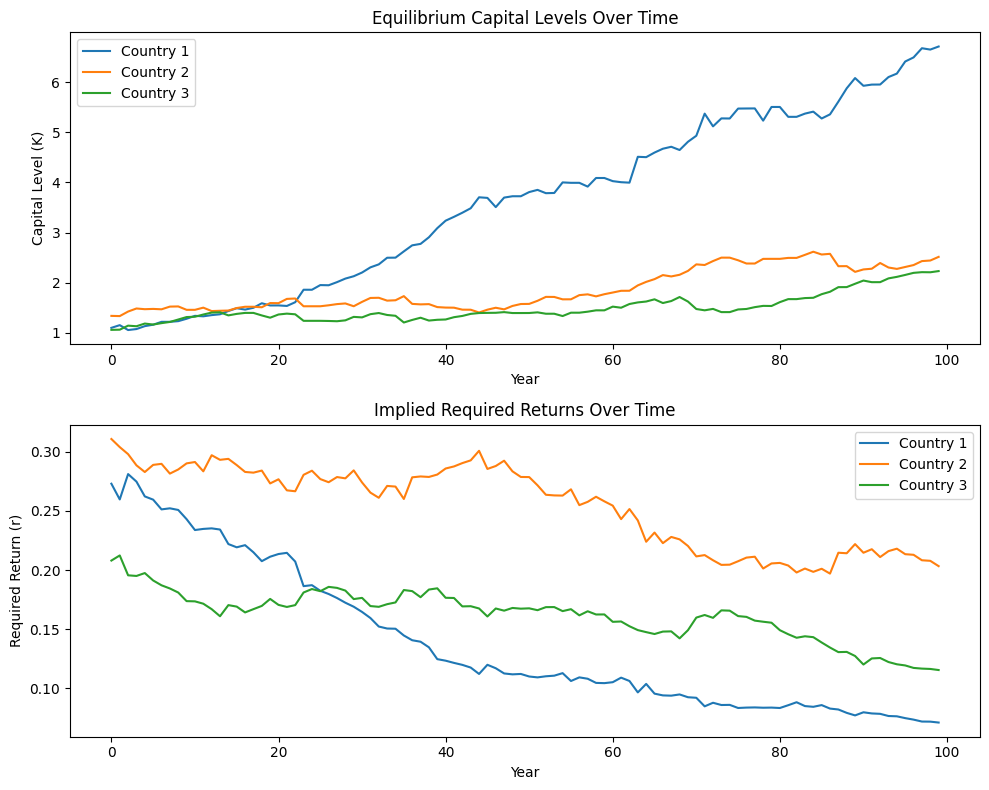

In [57]:
# Plot the K for each country over time
# and then in plot below the r
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# K plot
for i in range(N):
    K_values = [result["K"][i] for result in results]
    axes[0].plot(K_values, label=f"Country {i+1}")
    axes[0].set_title("Equilibrium Capital Levels Over Time")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Capital Level (K)")
    axes[0].legend()

# r plot
for i in range(N):
    r_values = [result["r"][i] for result in results]
    axes[1].plot(r_values, label=f"Country {i+1}")
    axes[1].set_title("Implied Required Returns Over Time")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Required Return (r)")
    axes[1].legend()

plt.tight_layout()
plt.show()

### Example 2

In [85]:
import numpy as np
from scipy.optimize import minimize
from functools import lru_cache
from tqdm import tqdm

# ---------------------------
# Helpers: production side
# ---------------------------

def mpk_vec(alpha_vec, mu_vec, K_vec):
    # Expected MPK: alpha * mu * K^(alpha-1)
    return alpha_vec * mu_vec * (K_vec ** (alpha_vec - 1))


# ---------------------------
# Household utility (prospect-ish + habit-ish, kept simple)
# NOTE: This is per household i given its portfolio row weights W_i.
# ---------------------------

def _utility_draws(
    W0_i,
    H0_i,
    C_i,
    W_next_draws,
    params
):
    # You had habit/prospect in earlier versions; keep minimal but consistent
    wealth_gap = W_next_draws - params["reference_level"]

    # consumption term (habit omitted here because your current notebook doesn't carry H dynamically;
    # you can extend: (C_i - H0_i) instead of C_i if you want)
    u_c = (C_i ** params["gamma"]) / params["gamma"]

    # prospect value
    pv = np.where(
        wealth_gap >= 0,
        wealth_gap ** params["alpha_gain"],
        -params["lambda_loss"] * ((-wealth_gap) ** params["beta_loss"])
    )

    return u_c + params["theta"] * pv


# ---------------------------
# Core: pricing function producing r_vec AND the weight matrix W
# ---------------------------

def household_pricing_function_matrix(
    expected_returns,   # vector length N (MPK proxy)
    params,
    rng,
    allow_cross_border=True,
    n_draws=200,
    use_cache=True
):
    """
    Returns:
      r_vec: implied required returns (length N)
      Wmat:  weight matrix (N x N), row i sums <= 1 (rest risk-free)
    """

    expected_returns = np.asarray(expected_returns, dtype=float)
    sigma_vec = np.asarray(params["sigma_vec"], dtype=float)
    W0_vec = np.asarray(params["W0_vec"], dtype=float)
    H0_vec = np.asarray(params["H0_vec"], dtype=float)

    N = len(expected_returns)

    # ----- Common random numbers (fixed across objective evals) -----
    # Standard normals Z_j ~ N(0,1) per asset j; fixed for this pricing call
    Z = rng.normal(0.0, 1.0, size=(N, n_draws))
    R_draws = expected_returns[:, None] + sigma_vec[:, None] * Z  # shape (N, n_draws)

    r_f = params["r_f"]

    # ----- Optimisation variables -----
    # If no cross-border: optimise only diagonal weights w_diag (length N)
    # If cross-border: optimise full W matrix flattened (length N*N)
    if not allow_cross_border:
        x0 = np.full(N, 0.5 / max(N, 1))  # initial diag guess (small)
    else:
        x0 = np.full(N * N, 0.5 / max(N, 1))  # initial full matrix guess

    # Bounds are handled via penalty (Nelder-Mead). Keep minimal changes.

    def unpack_weights(x):
        if not allow_cross_border:
            w_diag = np.maximum(x, 0.0)
            # enforce diag <= 1 individually by soft clamp (penalty handles >1 too)
            Wmat = np.zeros((N, N))
            np.fill_diagonal(Wmat, w_diag)
            return Wmat
        else:
            Wmat = x.reshape(N, N)
            Wmat = np.maximum(Wmat, 0.0)
            return Wmat

    def penalty_for_constraints(Wmat):
        # row sums must be <= 1
        row_sums = Wmat.sum(axis=1)
        pen = 0.0

        # negative weights already clipped, but still penalize if row sums > 1
        excess = np.maximum(row_sums - 1.0, 0.0)
        pen += 1e6 * np.sum(excess**2)

        if not allow_cross_border:
            # force off-diagonal to 0 (should already be 0 by construction)
            off_diag = Wmat - np.diag(np.diag(Wmat))
            pen += 1e6 * np.sum(off_diag**2)

        return pen

    def objective(x):
        Wmat = unpack_weights(x)
        pen = penalty_for_constraints(Wmat)
        if pen > 0:
            # still compute utility? no, penalty dominates
            return pen

        # compute expected utility across households (average)
        utils = []

        for i in range(N):
            w_i = Wmat[i, :]              # weights into risky assets
            w_rf = 1.0 - w_i.sum()        # residual into risk-free

            W0_i = W0_vec[i]
            H0_i = H0_vec[i]
            C_i = params["consumption_rate"] * W0_i

            # portfolio gross return draws: sum_j w_ij*(1+R_j) + w_rf*(1+r_f)
            gross_draws = np.dot(w_i, 1.0 + R_draws) + w_rf * (1.0 + r_f)

            # next wealth draws
            W_next = (W0_i - C_i) * gross_draws

            u = _utility_draws(W0_i, H0_i, C_i, W_next, params)
            utils.append(np.mean(u))

        # maximise utility -> minimise negative
        return -np.mean(utils)

    # ----- Optional caching (helps Nelder-Mead when K-minimiser reuses points) -----
    # Cache by rounding expected_returns and allow_cross_border + n_draws.
    # This is safe because we use common random numbers only per call,
    # so caching means "reuse a previous solved W for similar expected_returns".
    # If you want exact reproducibility, set use_cache=False.
    cache_key = None
    if use_cache:
        cache_key = (tuple(np.round(expected_returns, 6)), bool(allow_cross_border), int(n_draws))

    # simple manual cache dictionary (more transparent than lru_cache with numpy)
    if use_cache:
        if "_pricing_cache" not in params:
            params["_pricing_cache"] = {}
        if cache_key in params["_pricing_cache"]:
            return params["_pricing_cache"][cache_key]

    res = minimize(
        objective,
        x0,
        method="Nelder-Mead",
        options={"maxiter": params.get("maxiter_weights", 300), "disp": False}
    )

    Wmat_star = unpack_weights(res.x)

    # Enforce row-sum <= 1 softly (final clean-up)
    row_sums = Wmat_star.sum(axis=1)
    for i in range(N):
        if row_sums[i] > 1.0:
            Wmat_star[i, :] = Wmat_star[i, :] / row_sums[i]

    # ----- Implied required returns (simple but responsive to expected_returns) -----
    # Risk premium increases with:
    # - asset risk sigma^2
    # - total demand into that asset (column sum of Wmat)
    #
    # This makes r_j fall when demand shifts toward j (price goes up).
    # required return: r = E[R] - premium
    gamma_eff = abs(params["gamma"]) + params["theta"] * params["lambda_loss"]

    col_demand = Wmat_star.sum(axis=0)  # total risky weight flowing into each asset j
    premium = gamma_eff * (sigma_vec ** 2) * col_demand

    r_vec = expected_returns - premium

    out = (r_vec, Wmat_star)

    if use_cache:
        params["_pricing_cache"][cache_key] = out

    return out


# ---------------------------
# Equilibrium objective in K-space
# ---------------------------

def equilibrium_objective_K(
    K_vec,
    alpha_vec,
    mu_vec,
    delta_vec,
    params,
    rng,
    allow_cross_border=True,
    n_draws_pricing=200,
    use_cache=True
):
    K_vec = np.maximum(np.asarray(K_vec, dtype=float), 1e-8)

    MPK = mpk_vec(alpha_vec, mu_vec, K_vec)

    r_vec, _Wmat = household_pricing_function_matrix(
        expected_returns=MPK,
        params=params,
        rng=rng,
        allow_cross_border=allow_cross_border,
        n_draws=n_draws_pricing,
        use_cache=use_cache
    )

    err = MPK - (r_vec + delta_vec)
    return np.sum(err**2)


def solve_equilibrium_K(
    K_initial,
    alpha_vec,
    mu_vec,
    delta_vec,
    params,
    rng,
    allow_cross_border=True,
    n_draws_pricing=200,
    use_cache=True
):
    K_initial = np.maximum(np.asarray(K_initial, dtype=float), 1e-8)

    res = minimize(
        equilibrium_objective_K,
        K_initial,
        args=(alpha_vec, mu_vec, delta_vec, params, rng, allow_cross_border, n_draws_pricing, use_cache),
        method="Nelder-Mead",
        options={"maxiter": params.get("maxiter_K", 400), "disp": False}
    )

    K_star = np.maximum(res.x, 1e-8)

    MPK = mpk_vec(alpha_vec, mu_vec, K_star)
    r_star, W_star = household_pricing_function_matrix(
        expected_returns=MPK,
        params=params,
        rng=rng,
        allow_cross_border=allow_cross_border,
        n_draws=n_draws_pricing,
        use_cache=use_cache
    )

    return K_star, r_star, W_star


# ---------------------------
# Simulation loop (years)
# ---------------------------

def run_simulation(
    N_years,
    K_initial_vec,
    alpha_vec,
    mu_vec,
    delta_vec,
    params,
    seed=42,
    allow_cross_border=True,
    n_draws_pricing_solve=150,
    use_cache=True,
    verbose=False
):
    rng = np.random.default_rng(seed)

    K_vec = np.array(K_initial_vec, dtype=float)

    hist = {
        "K": [],
        "r": [],
        "Wmat": [],
        "MPK": []
    }

    for t in tqdm(range(N_years), desc="Simulating years", disable=not verbose):

        # Clear cache per year if you want (optional)
        # params["_pricing_cache"] = {}

        K_star, r_star, W_star = solve_equilibrium_K(
            K_initial=K_vec,
            alpha_vec=alpha_vec,
            mu_vec=mu_vec,
            delta_vec=delta_vec,
            params=params,
            rng=rng,
            allow_cross_border=allow_cross_border,
            n_draws_pricing=n_draws_pricing_solve,
            use_cache=use_cache
        )

        MPK_star = mpk_vec(alpha_vec, mu_vec, K_star)

        hist["K"].append(K_star.copy())
        hist["r"].append(r_star.copy())
        hist["Wmat"].append(W_star.copy())
        hist["MPK"].append(MPK_star.copy())

        # next year initial guess
        K_vec = K_star.copy()

        # if verbose:
        #     err = MPK_star - (r_star + delta_vec)
        #     print("max |MPK-(r+δ)|:", float(np.max(np.abs(err))))

    # convert arrays where sensible
    hist["K"] = np.array(hist["K"])
    hist["r"] = np.array(hist["r"])
    hist["MPK"] = np.array(hist["MPK"])
    # Wmat is list of matrices

    return hist


In [87]:
N = 3
N_years = 100

K_initial_vec = np.array([1.0, 1.2, 0.9])
alpha_vec = np.array([0.3, 0.35, 0.25])
mu_vec = np.array([1.0, 1.1, 0.9])
delta_vec = np.array([0.05, 0.05, 0.05])

params = {
    # household state per country
    "W0_vec": np.array([100.0, 100.0, 100.0]),
    "H0_vec": np.array([10.0, 10.0, 10.0]),

    # preferences
    "consumption_rate": 0.05,
    "gamma": -2.0,
    "theta": 0.5,
    "alpha_gain": 0.5,
    "beta_loss": 0.5,
    "lambda_loss": 2.0,
    "reference_level": 100.0,

    # asset side
    "r_f": 0.02,
    "sigma_vec": np.array([0.1, 0.1, 0.1]),

    # optimiser controls
    "maxiter_weights": 250,
    "maxiter_K": 300,
}

# Cross-border ON
hist_open = run_simulation(
    N_years=N_years,
    K_initial_vec=K_initial_vec,
    alpha_vec=alpha_vec,
    mu_vec=mu_vec,
    delta_vec=delta_vec,
    params=params,
    seed=42,
    allow_cross_border=True,
    n_draws_pricing_solve=150,
    use_cache=True,
    verbose=True
)

# Cross-border OFF (diagonal-only weights)
hist_closed = run_simulation(
    N_years=N_years,
    K_initial_vec=K_initial_vec,
    alpha_vec=alpha_vec,
    mu_vec=mu_vec,
    delta_vec=delta_vec,
    params=params,
    seed=42,
    allow_cross_border=False,
    n_draws_pricing_solve=150,
    use_cache=True,
    verbose=True
)

print("Last-year K (open):", hist_open["K"][-1])
print("Last-year K (closed):", hist_closed["K"][-1])

print("Last-year r (open):", hist_open["r"][-1])
print("Last-year r (closed):", hist_closed["r"][-1])

print("Last-year W matrix (open):\n", hist_open["Wmat"][-1])
print("Last-year W matrix (closed):\n", hist_closed["Wmat"][-1])

Simulating years:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating years: 100%|██████████| 100/100 [00:19<00:00,  5.21it/s]

Last-year K (open): [1.05028162 1.2456573  0.86145395]
Last-year K (closed): [1.05874017 1.27908499 0.83000738]
Last-year r (open): [0.26154341 0.3037728  0.22081369]
Last-year r (closed): [0.25825222 0.29807744 0.22874939]
Last-year W matrix (open):
 [[0.42039498 0.43333014 0.1227852 ]
 [0.28250653 0.34933964 0.36376579]
 [0.24140603 0.21734844 0.54058304]]
Last-year W matrix (closed):
 [[0.99991187 0.         0.        ]
 [0.         0.99999374 0.        ]
 [0.         0.         0.99983562]]


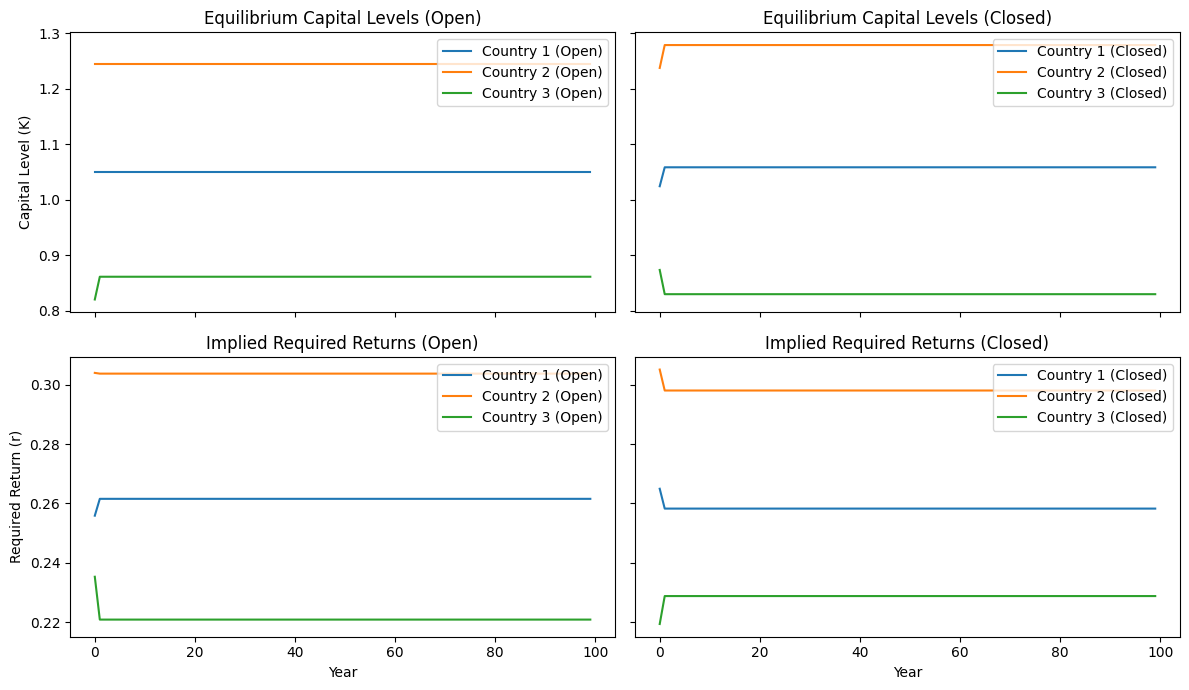

In [89]:
# Plot the r and K for open vs closed
# row 1: K open vs closed (2 columns, shared x and y axis)
# row 2: r open vs closed (2 columns, shared x and y axis)

fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey='row')

# K plots
for i in range(N):
    axes[0, 0].plot(hist_open["K"][:, i], label=f"Country {i+1} (Open)")
    axes[0, 1].plot(hist_closed["K"][:, i], label=f"Country {i+1} (Closed)")
axes[0, 0].set_title("Equilibrium Capital Levels (Open)")
axes[0, 1].set_title("Equilibrium Capital Levels (Closed)")
axes[0, 0].set_ylabel("Capital Level (K)")
axes[0, 0].legend()
axes[0, 1].legend()

# r plots
for i in range(N):
    axes[1, 0].plot(hist_open["r"][:, i], label=f"Country {i+1} (Open)")
    axes[1, 1].plot(hist_closed["r"][:, i], label=f"Country {i+1} (Closed)")
axes[1, 0].set_title("Implied Required Returns (Open)")
axes[1, 1].set_title("Implied Required Returns (Closed)")
axes[1, 0].set_xlabel("Year")
axes[1, 1].set_xlabel("Year")
axes[1, 0].set_ylabel("Required Return (r)")
axes[1, 0].legend()
axes[1, 1].legend()
plt.tight_layout()
plt.show()